In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from nlinec import get_models_dir, color_palette, gpartconv1d, get_all_types, get_granularity

In [3]:
GRANULARITY = 2
MODEL = f'nlinec-{GRANULARITY}-logging'

In [4]:
gran_types = []
for i in [1, 2, 3]:
    all_types = get_all_types(granularity=i)
    all_types['granularity'] = all_types['full_type'].apply(lambda x: get_granularity(x))
    gran_types.append(all_types[all_types['granularity'] == i])

In [5]:
# Read the 'accuracy.json' and 'loss.json' files in the model directory
with open(os.path.join(get_models_dir(), MODEL, 'accuracy.json'), 'r') as f:
    accuracy = pd.DataFrame(json.load(f), index=['accuracy']).T
    accuracy['step'] = accuracy.index
    accuracy['step'] = accuracy['step'].astype(int)

with open(os.path.join(get_models_dir(), MODEL, 'loss.json'), 'r') as f:
    loss = pd.DataFrame(json.load(f))
    loss['step'] = loss['step'].astype(int)

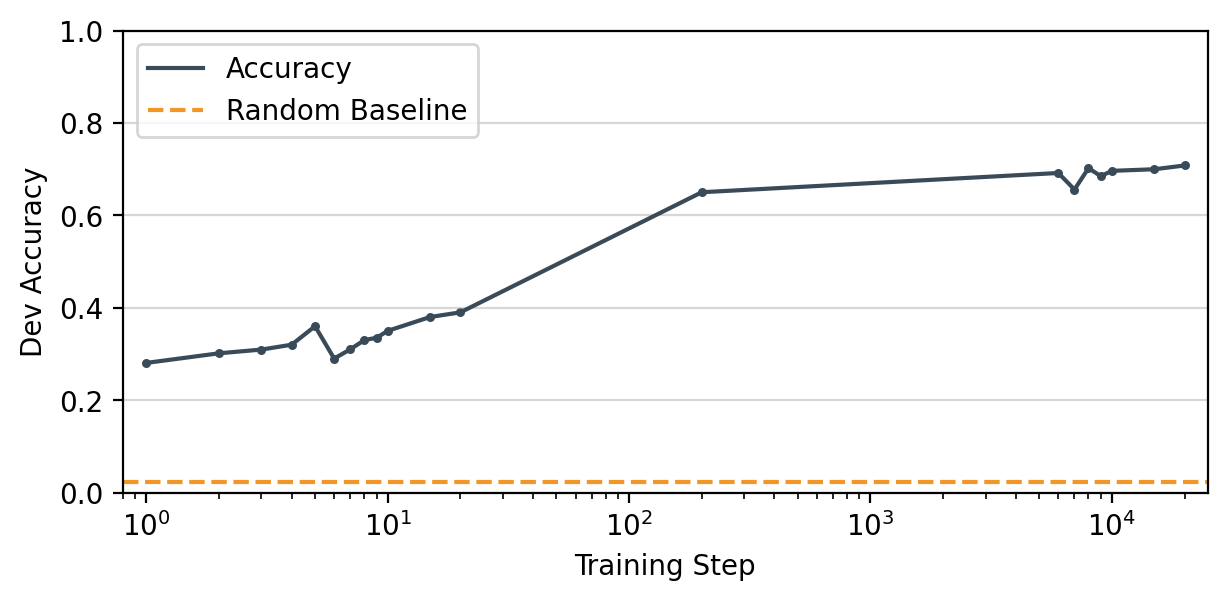

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), dpi=200)
ax.set_xlabel('Training Step')
ax.set_ylabel('Dev Accuracy')

ax.scatter(accuracy.step, accuracy['accuracy'], color=color_palette('medium'), s=5)
ax.plot(accuracy.step, accuracy['accuracy'], label='Accuracy', color=color_palette('medium'))

ax.axhline(1/len(gran_types[1]['full_type'].unique()), color=color_palette('accent'), linestyle='--', label='Random Baseline')

ax.set_ylim(0, 1)
ax.set_xlim(0.8, max(accuracy.step) / 0.8)

ax.grid(axis='y', alpha=0.5)

ax.legend(loc='upper left')
ax.set_xscale('log')